In [1]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/usr/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c104warnERKNS_7WarningE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


'cuda'

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define data transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images 
    transforms.ToTensor(),  # Convert images to PyTorch tensors (between 0 and 1)
])

# Load CelebA dataset
celeba_dataset = datasets.CelebA(root='./', download=False, transform=transform)

In [3]:
((celeba_dataset[0][0]-0.5)/0.5).min()

tensor(-1.)

In [4]:
# Splitting the dataset
total_samples = len(celeba_dataset)
train_samples = total_samples - 10000
eval_samples = 10000
train_dataset = torch.utils.data.Subset(celeba_dataset, range(train_samples))
eval_dataset = torch.utils.data.Subset(celeba_dataset, range(train_samples, total_samples))


normalize = transforms.Normalize(mean=[0., 0., 0.], std=[1., 1., 1.])  
#transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) 

# Apply normalization to the datasets
train_dataset_normalized = [normalize(image) for image, _ in train_dataset] #list of images . values between -1 and 1 
eval_dataset_normalized = [normalize(image) for image, _ in eval_dataset]


train_dataset_reshaped = torch.stack([data.squeeze(0) for data in train_dataset_normalized]) # one big tensor with all images . values between -1 and 1
eval_dataset_reshaped = torch.stack([data.squeeze(0) for data in eval_dataset_normalized])

In [5]:
train_dataset_normalized[0].max()

tensor(1.)

In [6]:
print(train_dataset_reshaped.shape, eval_dataset_reshaped.shape )

torch.Size([152770, 3, 256, 256]) torch.Size([10000, 3, 256, 256])


In [7]:
from pythae.models import VQVAE, VQVAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.celeba.resnets import Encoder_ResNet_VQVAE_CELEBA, Decoder_ResNet_VQVAE_CELEBA

In [8]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    num_epochs=100, # Change this to train the model a bit more
    steps_saving =10,
    scheduler_cls="ReduceLROnPlateau",
    scheduler_params={"patience": 10, "factor": 0.5}
    )


model_config = VQVAEConfig(
    latent_dim=256,
    input_dim=(3, 256, 256),
    commitment_loss_factor=0.25,
    quantization_loss_factor=1.0,
    num_embeddings=512,
    use_ema=True,
    decay=0.9 #0.99
)

model = VQVAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VQVAE_CELEBA(model_config),
    decoder=Decoder_ResNet_VQVAE_CELEBA(model_config)
)

In [9]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [10]:
pipeline(
    train_data=train_dataset_reshaped,
    eval_data=eval_dataset_reshaped
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model/VQVAE_training_2023-12-20_13-57-07. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 100
 - per_device_train_batch_size: 256
 - per_device_eval_batch_size: 256
 - checkpoint saving every: 10
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
Scheduler: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x7f578045bc50>

Successfully launched training !



Training of epoch 1/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 1/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 4853.8798
Eval loss: 2504.9951
--------------------------------------------------------------------------


Training of epoch 2/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 2/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 2315.4166
Eval loss: 2055.2552
--------------------------------------------------------------------------


Training of epoch 3/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 3/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1760.0705
Eval loss: 1599.9705
--------------------------------------------------------------------------


Training of epoch 4/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 4/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1563.9872
Eval loss: 1495.6273
--------------------------------------------------------------------------


Training of epoch 5/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 5/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1472.2309
Eval loss: 1413.9908
--------------------------------------------------------------------------


Training of epoch 6/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 6/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1393.3372
Eval loss: 1348.5739
--------------------------------------------------------------------------


Training of epoch 7/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 7/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1298.38
Eval loss: 1235.9826
--------------------------------------------------------------------------


Training of epoch 8/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 8/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1209.4078
Eval loss: 1175.5533
--------------------------------------------------------------------------


Training of epoch 9/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 9/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1153.7579
Eval loss: 1121.1215
--------------------------------------------------------------------------


Training of epoch 10/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 10/100:   0%|          | 0/40 [00:00<?, ?batch/s]

Saved checkpoint at epoch 10

--------------------------------------------------------------------------
Train loss: 1115.6915
Eval loss: 1091.0973
--------------------------------------------------------------------------


Training of epoch 11/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 11/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1084.9603
Eval loss: 1075.9957
--------------------------------------------------------------------------


Training of epoch 12/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 12/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1076.9402
Eval loss: 1088.844
--------------------------------------------------------------------------


Training of epoch 13/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 13/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1105.674
Eval loss: 1127.3946
--------------------------------------------------------------------------


Training of epoch 14/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 14/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1151.8412
Eval loss: 1157.9173
--------------------------------------------------------------------------


Training of epoch 15/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 15/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1183.7748
Eval loss: 1186.3504
--------------------------------------------------------------------------


Training of epoch 16/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 16/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1198.0251
Eval loss: 1204.25
--------------------------------------------------------------------------


Training of epoch 17/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 17/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1207.3374
Eval loss: 1216.7291
--------------------------------------------------------------------------


Training of epoch 18/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 18/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1218.8042
Eval loss: 1221.8357
--------------------------------------------------------------------------


Training of epoch 19/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 19/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1226.3364
Eval loss: 1219.4953
--------------------------------------------------------------------------


Training of epoch 20/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 20/100:   0%|          | 0/40 [00:00<?, ?batch/s]

Saved checkpoint at epoch 20

--------------------------------------------------------------------------
Train loss: 1232.5767
Eval loss: 1230.498
--------------------------------------------------------------------------


Training of epoch 21/100:   0%|          | 0/597 [00:00<?, ?batch/s]

Eval of epoch 21/100:   0%|          | 0/40 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 1244.5769
Eval loss: 1239.5691
--------------------------------------------------------------------------


Training of epoch 22/100:   0%|          | 0/597 [00:00<?, ?batch/s]

KeyboardInterrupt: 

In [12]:
import os
from pythae.models import AutoModel

In [13]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'checkpoint_epoch_10')).to(device)
#trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model')).to(device)

## Visualizing reconstructions

In [14]:
reconstructions = trained_model.reconstruct((eval_dataset_reshaped[:25]).to(device)).detach().cpu()

tensor(0.0313) tensor(0.9693)
tensor(0.0167) tensor(0.9653)
tensor(0.0197) tensor(0.9455)
tensor(0.0248) tensor(0.9536)
tensor(0.0428) tensor(0.9700)
tensor(0.0299) tensor(0.8694)
tensor(0.0341) tensor(0.9632)
tensor(0.0331) tensor(0.9685)
tensor(0.0214) tensor(0.9671)
tensor(0.0742) tensor(0.9149)
tensor(0.0175) tensor(0.9593)
tensor(0.0154) tensor(0.9630)
tensor(0.0328) tensor(0.9849)
tensor(0.0373) tensor(0.9755)
tensor(0.0264) tensor(0.9417)
tensor(0.0246) tensor(0.9647)
tensor(0.0326) tensor(0.9591)
tensor(0.0157) tensor(0.9855)
tensor(0.0457) tensor(0.9583)
tensor(0.0145) tensor(0.9078)
tensor(0.0327) tensor(0.9460)
tensor(0.0304) tensor(0.9708)
tensor(0.0153) tensor(0.9122)
tensor(0.0311) tensor(0.9810)
tensor(0.0646) tensor(0.9321)


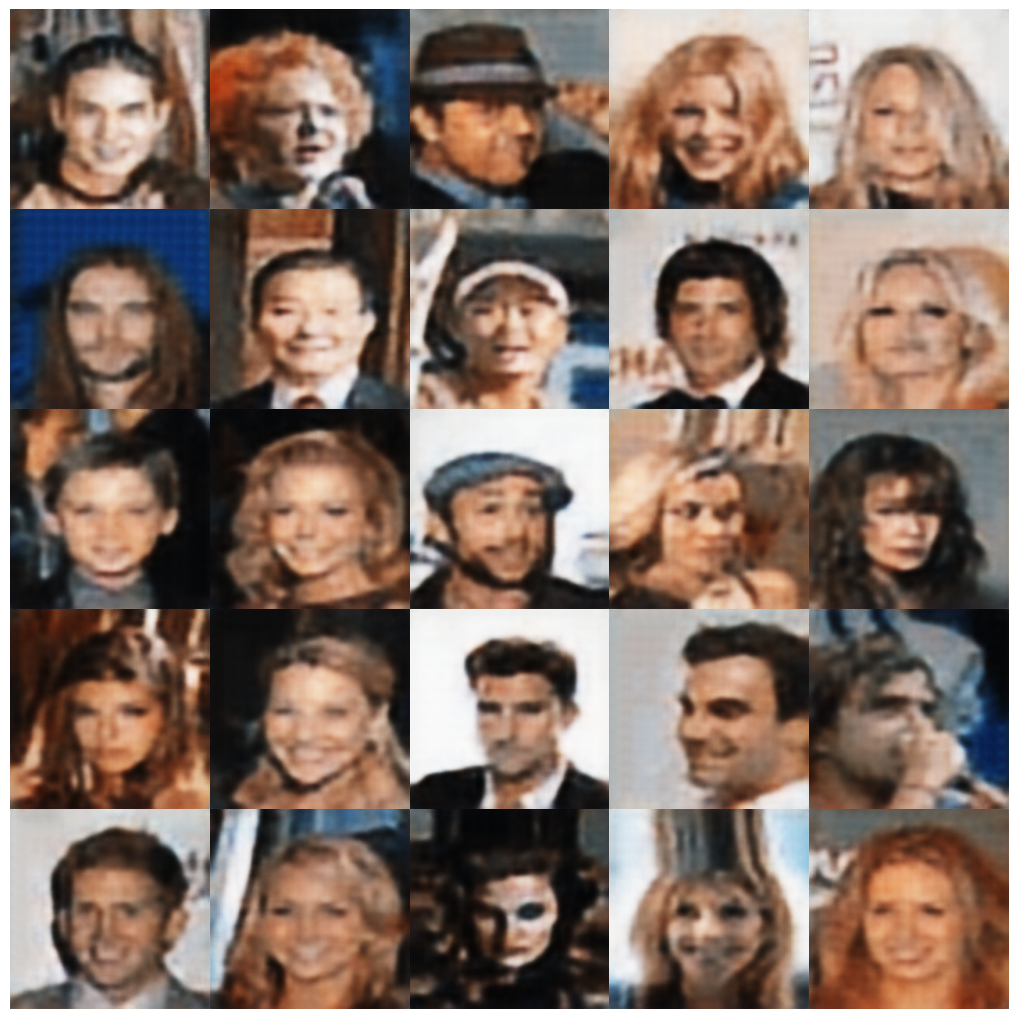

In [15]:
import matplotlib.pyplot as plt

# Assuming reconstructions is a list/tensor of RGB images of shape (N, C, H, W)
# N: Number of images, C: Number of channels, H: Height, W: Width

# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        # Assuming reconstructions is a list/tensor of RGB images
        axes[i][j].imshow( reconstructions[i * 5 + j].cpu().permute(1, 2, 0))  # Permute channels for Matplotlib (assuming tensor)
        axes[i][j].axis('off')
        print(reconstructions[i * 5 + j].min(), reconstructions[i * 5 + j].max())
plt.tight_layout(pad=0.)
plt.show()


tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(0.9961)
tensor(0.) tensor(0.9020)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.0039) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(0.9961)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(0.9176)
tensor(0.) tensor(1.)
tensor(0.) tensor(0.9725)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


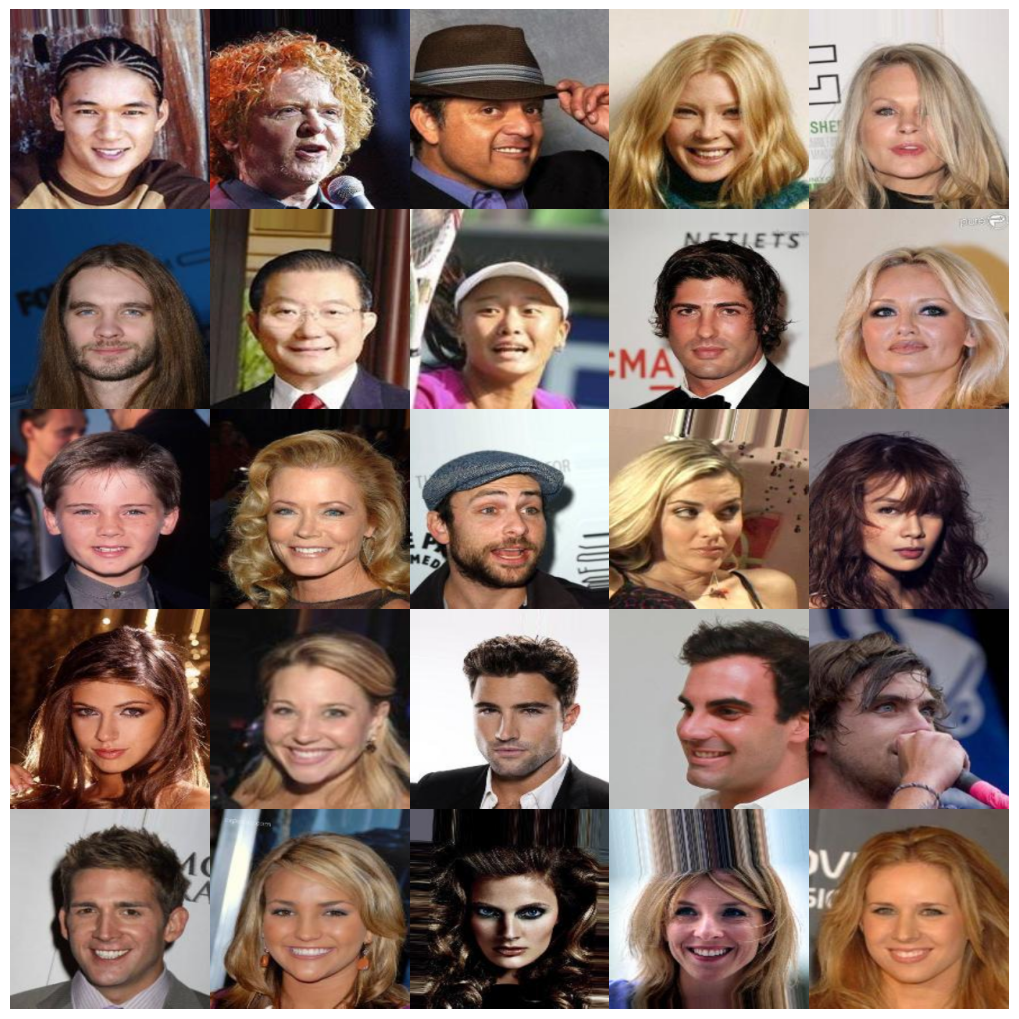

In [16]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j][0].cpu().permute(1,2,0))
        axes[i][j].axis('off')
        print(eval_dataset[i*5 +j][0].min(), eval_dataset[i*5 +j][0].max())
plt.tight_layout(pad=0.)

## Visualizing interpolations

In [17]:
interpolations = trained_model.interpolate(eval_dataset_reshaped[:5].to(device), eval_dataset_reshaped[5:10].to(device), granularity=10).detach().cpu()

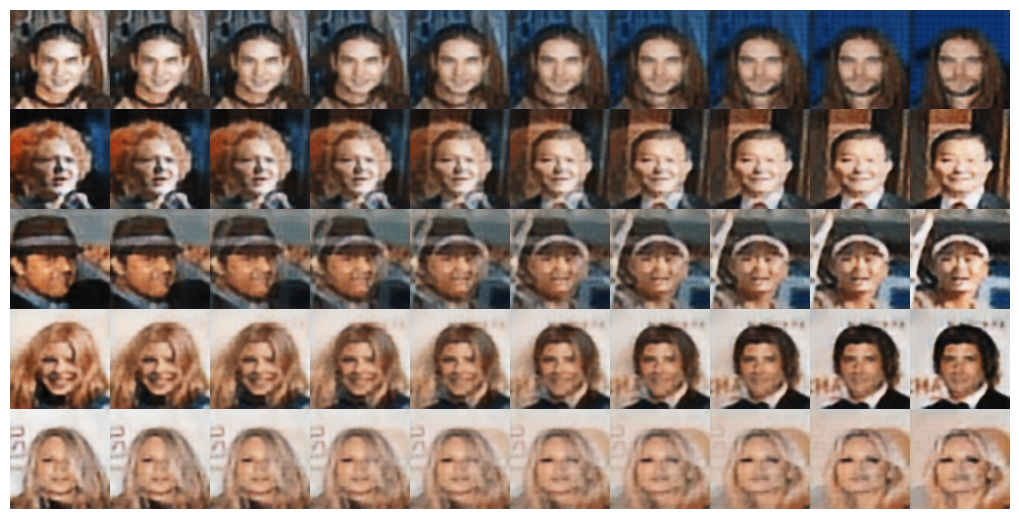

In [18]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().permute(1,2,0))
        axes[i][j].axis('off')
        
plt.tight_layout(pad=0.)